In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Industry footprint of Flat6Labs 
author: Oliver Tsappis, otsappis@googlemail.com
[HTML friendly version which doesn't include interactive bokeh and 3D plotly charts.]

### Brief overview
* Flat6Labs is a startup accelerator operating across the MENA region.
* Every startup invested in by the Flat6Labs fund impacts industries, people and markets around the world. 
* How can they measure these things to improve their business and help the startups in their portfolio?
* This project creates a visual map of startups, clustered by their industries to provide insights to support their business.
* This is simply an exploratory project, which actually raises more questions than it answers, so needs to be optimised and developed further to make useful conclusions.
##### Insights
* We find that Flat6Labs startups can be generalised e-commerce, tech and creative industries.
* Several startups operate between industries, which means their business models join industries in a relatively unique way and could mean a particularly innovate or disruptive idea. For example, Reform Studio operates somewhere between technology and creative industries using a socially responsible business model to disrupt the way we think about design and sourcing our home furniture.
* There seems to be more of a divide between creative industries and the rest, which could be exploited further by Flat6Labs investment strategy, although it could show trends in entreneurship in the region or that in comparison with other investors, thats already a high proportion. It needs further investigation or intuition.


### Background
##### What is Flat6Labs?
Flat6Labs is a leading startup accelerator operating in the MENA region, founded by Sawari Ventures in Cairo. Their aim is to push innovation in the Middle East & North Africa by supporting early stage startups and entrepreneurs with 3 tools:
	1. Angel investment.
	2. Acceleration program: If selected, local entrepreneurs are trained and connected to a network of experts and investors to improve performance of their startups.
	3. Follow-on investment program. 
Their main objectives: 
	1. To give local entrepreneurs a platform to bring innovation to local and global markets for the greater good of MENA economies and people.
	2. Improve value of their angel & follow-on investment portfolios.

 
In order to create the largest impact and return possible, Flat6Labs must optimise their startup selection procedure and acceleration program. To do this effectively, they must understand the complex world in which they operate: industries, people, markets etc. This is especially important information for the selection committee and program managers. These people need to know the future potential of applicants and in what way to help startups already in the acceleration program. Being able to model, visualise and communicate these things would allow Flat6Labs to understand the entreprenurial environment better and find opportunities to optimise their business:
	- What types of problems are regional entrepreneurs trying to solve?
	- What types of businesses are investors most excited about?
	- What strengths, patterns or gaps are their in the investment strategy of Flat6Labs?
    - Where can technology and recent innovation can be applied elsewhere, especially tech developed inside the Flat6Labs portfolio?
	- What business models are having the largest impact in terms of investment, revenue, employment etc.?

One company that is already modeling this kind of data and is answering these types of questions for their clients is Quid, who've partly inspired this project. You can read more on how they do it here (non-technical): https://goo.gl/YeD1EH

The scope of this kind of research can be huge, but we will start by looking at industries the startups are currently operating in and dive a bit deeper from there.

### Objective
* To visualise the map of Flat6Labs' investment portfolio of startups in terms of their industries.
* Imply some answers to the questions: 
	1. What types of problems are regional entrepreneurs trying to solve?
	2. What patterns or gaps are their in the investment strategy of Flat6Labs?
    3. Are there any potential market gaps the selection team should look into?

### Data
* We have available a list of Flat6Labs startups, each tagged with their industries.
* The tags were authored by myself based on indipendent research. 
* Not all the startups are still currently operating, so the list shows the ideas that Flat6Labs have directly invested in
* Columns: name | industry.
* Each startup can have multiple entries.

### Approach
* Principle component analysis (PCA) will be used to generate coordinates to visualise the startups on a map, positioned according to their individual combination of industries. 
* K-means will be used to allocate startups to clusters.
* We have the following industry maps:
    - Level 1: This first map will show all Flat6Labs startups in 3 main clusters as an intro.
    - Level 2: The second map will break-down these 3 clusters into 8 clusters to give more detail.
    
### Model limitations
* It doesn't pick out some key industries very well, for example there are a few startups in film, but they get swallowed up into 'creative' and 'e-commerce' clusters.
* There are a few startups that are allocated to some clusters that don't follow the same logic as the majority.
* It would be nice to be able to interpret the white spaces between clusters, but PCA can't reliably tell you much by the actual coordinates it provides. It should only be used as an approximation really (credit to Mohammady Mahdy in Cairo for pointing it out).

### Future steps
* Modelling the clusters in 3d to show relationships between startups, most likely using plotly.
* Optimise the level 2 footprint using trial and error with multiple k-means arrangements.
* It would be interesting to use a network graph approach on top of the clustering algorithm, showing direct links between startups, perhaps defining the edges with a different set of data.
* Improve presentational elements eg. adjusting marker sizes to show number of employees or level of investment.
* Adjust the dimension reduction approach to make the white spaces between startups interpretable. This would be useful for better spotting the startups with disruptive business models.



### Data import & initial exploration
* Checking data cleanliness.
* Running some descriptive stats on the column for startup names.

In [2]:
''' Data Import '''
import pandas as pd
import numpy as np

# importing startup names and their industry tags
df = pd.read_csv('data/industry_complete.csv', usecols=["name", "industry"])
df.head()

,name,industry
0,Aquaponica,Technology
1,Aquaponica,Food
2,Aquaponica,Agriculture
3,Argineering,Manufacturing
4,Argineering,Education


In [3]:
''' Data Exploration '''
# print(df.describe())
# print(df.info())
df.shape # we seem to have NaN value in the industry tag column

print(df[df.isnull().any(axis=1)])
# lets get rid of that one
df.dropna(inplace=True)

# frequency tables and some descriptive stats
def tab_expl(col):
    tab = pd.crosstab(index=col, columns="count")
    tab.sort_values(by='count', ascending=False, inplace=True)
    print(tab.describe())
    print(tab.head(20))
    return tab
    
# entries of each startup
name_tab = tab_expl(df['name'])

            name industry
298  ServiceTime      NaN
col_0       count
count  138.000000
mean     4.702899
std      1.861674
min      1.000000
25%      4.000000
50%      5.000000
75%      6.000000
max     11.000000
col_0                count
name                      
Asknative               11
Crowdsway               11
Argineering             10
Reform Studio            9
Games Bond               9
LightSense               8
Heero                    7
Instabug                 7
Pushbots                 7
Dabchy                   7
Conative Labs            7
Narrativa                7
Solvermine               7
Integreight              7
Irth Cultural Guide      7
You Positive             7
Metaphorio               7
iRehab                   7
iboat                    7
Gorfah                   6


* lets see the same descriptive stats on the industry tag column

In [4]:
# industry tags
ind_tab = tab_expl(df['industry'])

col_0      count
count  85.000000
mean    7.635294
std    10.774581
min     1.000000
25%     1.000000
50%     3.000000
75%     8.000000
max    60.000000
col_0                  count
industry                    
Web                       60
Technology                45
E-commerce                42
Marketing                 40
Creative                  26
Mobile                    25
Professional Services     22
Social Network            19
Design                    19
Social                    18
Software                  18
Education                 17
Data                      17
Logistics                 16
Content                   15
Mobile                    14
Crowdsourcing             11
Manufacturing             11
Hardware                  10
Finance                   10


Important take-aways: 
1. On average, a startup should have 5 tags.
2. Theres a range of 10 tags between the one with the least and most (could impact our model).
3. Our top industries are 'web','tech','e-commerce' and 'marketing'

The K-means model will be looking for common tags, so lets see how many industries that belong to only 1 startup:

In [5]:
unique_inds = ind_tab[ind_tab['count'] == 1] 
unique_inds_count = unique_inds['count'].count()
unique_inds
print("We have {} industries that only 1 startup operates in".format(unique_inds_count)) 

We have 24 industries that only 1 startup operates in


* More than a quarter, which may have an interesting influence over the model, but we wont remove them for now.

### Data preprocessing
* We will create a sparse matrix of binary, similar to how a natural language processesing analysis might prep.

In [8]:
''' Data Preprocessing '''
# creating a csr matrix with tags as features and binary documents to show if a startup has a tag or not
df['values'] = 1
matrix = df.pivot_table(index=['name'], columns=['industry'], values=['values'])
matrix = matrix.fillna(0).reset_index()

# save a list of the industry columns to fit the KMeans model
x_cols = matrix.columns[1:]

* An elbow analysis will give us an idea of how many clusters we should think of selecting.

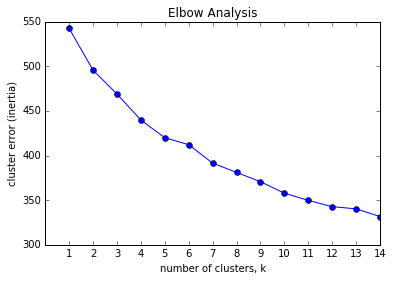

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks = range(1,15)
cluster_errors = []

for k in ks:
    # create KMeans instance with k clusters
    model = KMeans(k)
    # fit model to matrix
    model = model.fit(matrix[x_cols])
    # append the inertia to the list of inertias
    cluster_errors.append(model.inertia_)

# visualise the inertias with their k
plt.plot(ks, cluster_errors, '-o')
plt.title('Elbow Analysis')
plt.xlabel('number of clusters, k')
plt.ylabel('cluster error (inertia)')
plt.xticks(ks)
plt.show()

we can interpret that 3-5 clusters are preferable. Because we know that 'tech', 'e-commerce' and 'marketing' tags are the most common, lets give the model a chance to create 3 clusters with one of these the most common tag in each, which will be our level 1 map. Were ignoring the 'web' tag which is actually the most common, because it's less defined as an industry.

We need to add more clusters to drill down into a more detailed map, but the elbow analysis doesn't give much away as to how many we should use. So we could use trial and error to produce a map that makes business sense ie. we don't have too many startups in unexpected clusters.

* Next, its time to create our first clusters with K-means and plotting coordinates with PCA.

In [12]:
# creating prediction labels using kmeans
model = KMeans(3, random_state=4)
matrix['labels'] = model.fit_predict(matrix[x_cols])

# having a quick look at the distribution of our labels
labels_tab1 = pd.crosstab(index=matrix['labels'], columns='count')
print(labels_tab1) # most of the startups seem to be in the cluster labeled '0'

# PCA for generating the coordinates for visualising
from sklearn.decomposition import PCA
pca = PCA(2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]

matrix = matrix.reset_index()

col_0   count
labels       
0          76
1          40
2          22


* We can see most startups fall under the mysterious '0' cluster label.
* Time to figure out what industries characterise these clusters.

In [14]:
df_c = matrix.copy() # make a copy to avoid warnings
df_c.columns = df_c.columns.droplevel(1)
df_c.drop([x for x in df_c.columns if x not in ['name','x','y','labels']], inplace=True, axis=1)

# mapping the cluster labels to df where we have our industry tags
df['labels'] = df['name'].map(df_c.set_index('name')['labels'])

# picking out the 6 most common industries in each cluster
ind_counts = df.groupby(['labels', 'industry']).size()
ind_counts = ind_counts.groupby(level=0).nlargest(6)
ind_counts

labels  labels  industry             
0       0       Web                      38
                E-commerce               35
                Marketing                31
                Professional Services    18
                Social Network           15
                Logistics                13
1       1       Technology               38
                Data                     14
                Web                      10
                Mobile                    9
                Software                  9
                AI                        8
2       2       Creative                 22
                Design                   14
                Web                      12
                Education                10
                Art                       7
                Gaming                    7
dtype: int64

* bit messy with the duel 'labels' index but you get the picture.

Interestingly the model has bundled 'web', 'e-commerce' and 'marketing' together in cluser 0. Many e-commerce startups at Flat6Labs are actually 2-sided platforms, marketing to customers mainly with professional services, so cluster 0 makes business sense. clusters 1 and 2 split technology and creative startups, so all 3 clusters are split in a logical way, with the 'e-commerce' cluster the most populus.

### Level 1 industry footprint
* Here we will visualise the clusters we've just generated.


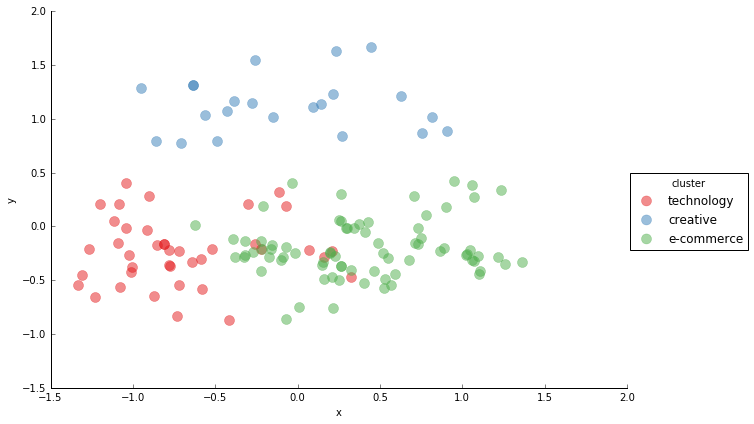

In [51]:
mapping = {0:'e-commerce', 1:'technology', 2:'creative'}
df_c['cluster'] = df_c['labels'].map(mapping)

# Visualise
import seaborn as sns
g = sns.lmplot(data=df_c, x='x', y='y', fit_reg=False, hue='cluster', size=6, aspect=1.5, palette='Set1',
                      scatter_kws={"s": 100, 'alpha': 0.5})

##### Can we infer any answers to our questions from this?

##### On the Flat6Labs investment strategy
In this chart, technology, e-commerce and creative industries were the most common types across the startups. This might not tell us a whole lot, but it shows there's quite a wide range of industries that Flat6Labs likes to invest in.

##### On the motivation of local entrepreneurs
There might be fewer startups in the creative cluster compared to the other two, but i'd imagine thats actually a pretty high ratio for an angel investor (with no evidence to back up that point). It could mean entrepreneurs in the MENA region are particularly creative and design focused compared to there counterparts elsewhere. 

##### On the potential market opportunities
You can also see that there isn't as much cross-over between creative companies with tech or e-commerce, whereas tech and e-commerse regularly go hand-in-hand. Perhaps there are market opportunities not being exploted using tech or e-commerce in creative industries, but we can dig a bit deeper to get a better picture.

### Level 2 industry footprint
* Next we will re-model with 8 clusters rather than 3 to pick out some of the more nuanced industries that make up the big 3 we see in the level 1 footprint.

In [52]:
# creating prediction labels using kmeans
model = KMeans(8, random_state=4)
matrix['labels2'] = model.fit_predict(matrix[x_cols])

# taking a look to find the characteristics of these clusters
df_d = matrix.copy() # make a copy to avoid warnings
df_d.columns = df_d.columns.droplevel(1)
df_d.drop([x for x in df_d.columns if x not in ['name','x','y','labels2']], inplace=True, axis=1)
df['labels2'] = df['name'].map(df_d.set_index('name')['labels2'])

ind_counts = df.groupby(['labels2', 'industry']).size()
ind_counts = ind_counts.groupby(level=0).nlargest(4)
print(ind_counts)


# lets map these clusters in the same way as before, to describe the industrial characteristics
mapping2 = {0:'e-commerce: marketing & professional services', 1:'tech: software, mobile & AI', 2:'tech: hardware & IoT',
          3:'e-commerce: logistics & crowdsourcing', 4:'social network: content & marketing', 5:'creative: design & education', 
           6:'finance: professional services & banking', 7:'social: sustainability & waste management'}

df_d['cluster'] = df_d['labels2'].map(mapping2)

# seeing the distribution given the new cluster names
labels_tab2 = pd.crosstab(index=df_d['cluster'], columns='count')
print(labels_tab2)

labels2  labels2  industry             
0        0        Web                      31
                  Marketing                26
                  E-commerce               25
                  Professional Services    13
1        1        Technology               16
                  Mobile                   13
                  Data                     10
                  Software                  9
2        2        Technology               18
                  Web                       8
                  Manufacturing             6
                  Hardware                  5
3        3        E-commerce               11
                  Logistics                10
                  Mobile                    4
                  Professional Services     3
4        4        Social Network           13
                  Content                   8
                  Marketing                 7
                  Web                       6
5        5        Creative              

* a fairly even distribution other than the smaller social cluster and the larger e-commerce with marketing cluster

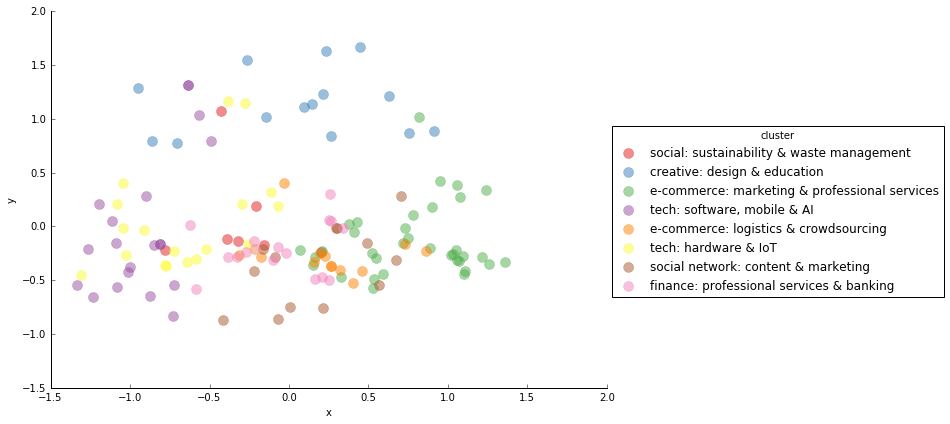

In [53]:
#visualise
g = sns.lmplot(data=df_d, x='x', y='y', fit_reg=False, hue='cluster', size=6, aspect=1.5, palette='Set1',
              scatter_kws={"s": 100, "alpha": 0.5})

##### On the Flat6Labs investment strategy and motivations of local entrepreneurs
There's a reasonable sized group of startup's who's main focus is social impact, ie. sustainability, waste management, renuable energy, agritech. Considering the difficulty of bringing heavily vocational startups to market (they are largely dependent on experimental tech), it's admirable that Flat6Labs invests in this area and so many MENA entrepreneurs are driven to solve social problems. 

The same could be said for educational startups that are largely in the creative cluster using gaming like SpicaTech Academy to teach kids about game development. There are other startups that are tackling the education space however, with tech, like GitHelp and e-commerce, like Marj3 and iRehab. 

##### On the market opportunities and unique startups
* Looking at the space between the creative cluster and the rest, Reform Studio (social cluster) stands out. They specialises in designing and manufacturing furniture using plastic waste like plastic bags. They're using industries common for tech companies such as 'manufacturing', 'waste management', 'sustainability' as well as being in 'creative' and 'design' like others located nearby. 
* Gorfah is another startup trying to bridge the gap between creative industries and the rest, in this case, with e-commerce. They specialise in providing interior design services.
* The tech & software startups that also involve creative industries tend to be mobile gaming companies, perhaps there are otherways to utilise tech in the creative domain.

### Evaluating the model

##### Intuitive limitations:
1. You can see visually, the level 2 charts look all over the place, so not as pleasing on the eye but there are 2 key reasons for that:
    - The way the industry tags were allocated to startups to build the raw data has brought a lot of startups closer together in the map.
    - The way k-means builds the clusters using the most important tags, meaning a startup could be located very close to another, but is allocated to a different cluster.

2. Some niche industries don't get picked out very well, for example, there are actually a few startups working in the film industry, but they got swallowed up into the 'creative' cluster. This might not necessarily be wrong, but means there's some detail were not capturing here.

3. Some important industries don't get picked out well because they are used evenly across a few clusters. For example, startups who work heavily in 'AI' and 'data' arn't so obvious in this map because they are actually spread across some much larger industries, like 'e-commerce', 'technology' and 'creative'. This will mean it's diffcult to visually look for those types of startups without adding a manual layer of analysis.

4. There are startups that are placed in very intuitive clusters, but others in a completely unexpected one, showing the difficulty of trying to match business logic with that of an algorithm. A perfect example of this is Dashroad, who make car sensors that capture data for fleet management such as route and fuel consumption. They have been tagged with the industries 'hardware', 'IoT', 'technology', 'data' and 'auto', so logically you'd expect them to be in the 'tech: hardware & IoT' cluster with other hardware statups. The algorithm then chose to put them in a cluster with mainly software companies, possibly seeing a connection between them at the 'data' industry tag. 

##### Questions that still need answering:
* Startups have differing numbers of tags, with a difference of 10 between the startup with the least (1) and with the most (11). How does this impact the model?
* What percentage of startups are in 'unexpected' clusters, and what number of clusters and random state in the k-means model is the most accurate? 